<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Sarmen_Sinanian_LS_DS6_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# TODO - your code!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
# from scipy import stats
from scipy.stats import t, ttest_1samp, chisquare
import seaborn as sns

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
columns = ['party','handicapped-infants','water-project-cost-sharing',
           'adoption-of-the-budget-resolution','physician-fee-freeze',
           'el-salvador-aid','religious-groups-in-schools',
           'anti-satellite-test-ban','aid-to-nicaraguan-contras'
           ,'mx-missile','immigration','synfuels-corporation-cutback'
           ,'education-spending','superfund-right-to-sue','crime',
           'duty-free-exports','export-administration-act-south-africa']
df.columns=columns

In [6]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df.replace('y', 1, inplace=True)

In [0]:
df.replace('n', 0, inplace=True)

In [11]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [13]:
rep.count()

party                                     168
handicapped-infants                       165
water-project-cost-sharing                148
adoption-of-the-budget-resolution         164
physician-fee-freeze                      165
el-salvador-aid                           165
religious-groups-in-schools               166
anti-satellite-test-ban                   162
aid-to-nicaraguan-contras                 157
mx-missile                                165
immigration                               165
synfuels-corporation-cutback              159
education-spending                        155
superfund-right-to-sue                    158
crime                                     161
duty-free-exports                         156
export-administration-act-south-africa    146
dtype: int64

In [14]:
print('Republican Support:', rep['handicapped-infants'].mean())
print('Democrat Support:', dem['handicapped-infants'].mean())

Republican Support: 0.18787878787878787
Democrat Support: 0.6046511627906976


In [0]:
# n = len(rep['handicapped-infants'])

In [16]:
sample = rep.sample(80)
sample

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
99,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0
122,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
71,republican,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
155,republican,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
248,republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
279,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
405,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
256,republican,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [0]:
n=435

In [0]:
dof = n-1

In [19]:
# The Mean of Means:
sample_mean_HI = np.mean(sample['handicapped-infants'])
print(sample_mean_HI)

0.14102564102564102


In [20]:
real_mean_all = np.mean(rep)
real_mean_all

handicapped-infants                       0.187879
water-project-cost-sharing                0.506757
adoption-of-the-budget-resolution         0.134146
physician-fee-freeze                      0.987879
el-salvador-aid                           0.951515
religious-groups-in-schools               0.897590
anti-satellite-test-ban                   0.240741
aid-to-nicaraguan-contras                 0.152866
mx-missile                                0.115152
immigration                               0.557576
synfuels-corporation-cutback              0.132075
education-spending                        0.870968
superfund-right-to-sue                    0.860759
crime                                     0.981366
duty-free-exports                         0.089744
export-administration-act-south-africa    0.657534
dtype: float64

In [21]:
sample_mean_all = np.mean(sample)
sample_mean_all

handicapped-infants                       0.141026
water-project-cost-sharing                0.527027
adoption-of-the-budget-resolution         0.144737
physician-fee-freeze                      0.987013
el-salvador-aid                           0.935897
religious-groups-in-schools               0.871795
anti-satellite-test-ban                   0.250000
aid-to-nicaraguan-contras                 0.160000
mx-missile                                0.155844
immigration                               0.545455
synfuels-corporation-cutback              0.120000
education-spending                        0.863014
superfund-right-to-sue                    0.842105
crime                                     0.987013
duty-free-exports                         0.106667
export-administration-act-south-africa    0.625000
dtype: float64

In [0]:
# ?np.mean

In [23]:
sample_std_all_rep = np.std(sample, ddof=0)
sample_std_all_rep


handicapped-infants                       0.348048
water-project-cost-sharing                0.499269
adoption-of-the-budget-resolution         0.351835
physician-fee-freeze                      0.113218
el-salvador-aid                           0.244936
religious-groups-in-schools               0.334318
anti-satellite-test-ban                   0.433013
aid-to-nicaraguan-contras                 0.366606
mx-missile                                0.362708
immigration                               0.497930
synfuels-corporation-cutback              0.324962
education-spending                        0.343833
superfund-right-to-sue                    0.364642
crime                                     0.113218
duty-free-exports                         0.308689
export-administration-act-south-africa    0.484123
dtype: float64

In [24]:
sample_std = np.std(sample['handicapped-infants'], ddof=0)
sample_std

0.3480479989871339

#WHY USE DDOF = 1 WHEN WE ALREADY SUBTRACT 1 FROM THE SAMPLE SIZE DURING DOF CALCULATION? (BELOW)

In [25]:
std_err = sample_std/n**.5
#one sided t test .975 is equal to .95 on a two sided because you multiply (1-.975)*2
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)
# 95% confidence interval
CI = (sample_mean_HI-(t_stat*std_err), sample_mean_HI+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9654450635078535
Confidence Interval (0.10822703228844058, 0.17382424976284147)


In [0]:
# ?np.std

In [0]:
# ?t.interval

In [28]:
std_err = sample_std_all_rep/n**.5
#one sided t test .975 is equal to .95 on a two sided because you multiply (1-.975)*2
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)
# 95% confidence interval
CI = (sample_mean_all-(t_stat*std_err), sample_mean_all+(t_stat*std_err))
print("Confidence Interval")
print('\n')
CI

t Statistic: 1.9654450635078535
Confidence Interval




(handicapped-infants                       0.108227
 water-project-cost-sharing                0.479978
 adoption-of-the-budget-resolution         0.111581
 physician-fee-freeze                      0.976344
 el-salvador-aid                           0.912816
 religious-groups-in-schools               0.840290
 anti-satellite-test-ban                   0.209195
 aid-to-nicaraguan-contras                 0.125453
 mx-missile                                0.121664
 immigration                               0.498532
 synfuels-corporation-cutback              0.089377
 education-spending                        0.830612
 superfund-right-to-sue                    0.807743
 crime                                     0.976344
 duty-free-exports                         0.077577
 export-administration-act-south-africa    0.579378
 dtype: float64, handicapped-infants                       0.173824
 water-project-cost-sharing                0.574076
 adoption-of-the-budget-resolution         0.177

In [0]:
# ?sns.kdeplot

In [0]:
sample['handicapped-infants'].dropna(inplace=True)
# sample['handicapped-infants']

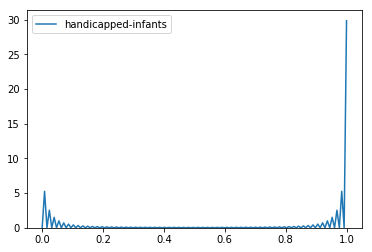

In [31]:
sns.kdeplot(sample['handicapped-infants'])
# plt.axvline(x=CI[0], color='red')
# plt.axvline(x=CI[1], color='red')
# plt.axvline(x=sample_mean, color='k');

#CHI SQUARED TEST (ONLY TESTS INDEP/DEPEND OF *CATEGORICAL VAR*)
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
- By hand using Numpy
- In a single line using Scipy

In [32]:
adult = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
columns = ['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 'occupation',
                             'relationship', 'race', 'sex', 'capital-gain',
                             'capital-loss','hours-per-week','native-country',
                             'income']
adult.columns = columns
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [36]:
adult.describe(exclude="number")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
# ?df.describe()

In [38]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9','10-19','20-29','30-39','40-49','50+']
adult['hours_per_week_categories'] = pd.cut(adult['hours-per-week'], cut_points, labels=label_names)

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [0]:
# ?pd.cut()

In [40]:
adult['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [41]:
adult['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [42]:
#CROSSTAB
ct = pd.crosstab(adult['sex'], adult['hours_per_week_categories'])

ct

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [43]:
#CONTINGENCY TABLE
contingency_table = pd.crosstab(adult['sex'], adult['hours_per_week_categories'], margins=True)
contingency_table
#CONTINGENCY TABLE IS SIMPLY THE CROSSTAB WITHOUT THE MARGINS/TOTALS

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,6462,1246,18336,3667,458,2392,32561


In [44]:
#SORTING BECAUSE THE BOTTOM OF THE CROSSTAB HAS WEIRD TOTALS.
# ESSENTIALLY, THE TOTALS ARE FLIPPED FROM WHERE THEY SHOULD BE.
adult = adult.sort_values(by='hours_per_week_categories',ascending=True)

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,hours_per_week_categories
31290,55,Self-emp-not-inc,41938,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,8,United-States,<=50K,0-9
5172,32,?,134886,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,2,United-States,>50K,0-9
22928,17,?,332666,10th,6,Never-married,?,Own-child,White,Female,0,0,4,United-States,<=50K,0-9
7902,35,Private,359131,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,7298,0,8,?,>50K,0-9
6604,41,Private,406603,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,6,Iran,<=50K,0-9


In [45]:
#THIS ONE IS CORRECTLY ADDED UP ON THE BOTTOM ROW TOTALS
contingency_table = pd.crosstab(adult['sex'], adult['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [46]:
female_count = contingency_table.iloc[0][0:6].values
female_count

array([ 235,  671, 1287, 1914, 5636, 1028])

In [47]:
male_count = contingency_table.iloc[1][0:6].values
male_count

array([  223,   575,  1105,  1753, 12700,  5434])

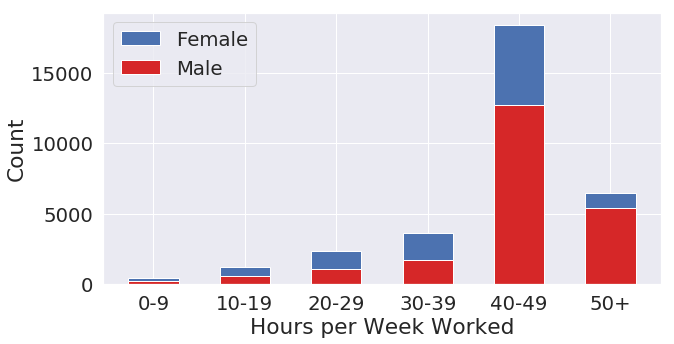

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['0-9','10-19','20-29','30-39','40-49','50+']
p1 = plt.bar(categories, male_count, .55, color = '#d62728')
p2 = plt.bar(categories, female_count, .55, bottom = male_count)
plt.legend((p2[0],p1[0]), ('Female','Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

#Expected Value Calculation

In [49]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [50]:
total = contingency_table.loc['All','All']
total

32561

In [51]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

print(np.array(expected))

[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [52]:
observed = pd.crosstab(adult['sex'], adult['hours_per_week_categories']).values
observed

array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

#Chi-Squared Statistic With Numpy

In [53]:
#SINCE 'EXPECTED' TABLE AND 'OBSERVED' TABLE ARE IN THE SAME SHAPES,  
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

print(np.array(expected))
print(np.array(expected).shape)

[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]
(2, 6)


In [54]:
observed = pd.crosstab(adult['sex'], adult['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [55]:
#CALCULATE CHI-SQUARED TEST STATISTIC
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f'Chi-Squared: {chi_squared}')

Chi-Squared: 2287.190943926107


In [56]:
#Calculate Degrees Of Freedom
# 5*1
dof=  (len(row_sums)-1)*(len(col_sums)-1)
print(f'Degrees of Freedom: {dof}')

Degrees of Freedom: 5


#RUN A CHI-SQUARED TEST USING SCIPY

In [57]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-Squared: {chi_squared}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom:{dof}')
print('Expected: \n', np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom:5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


#Null Hypothesis: Hours worked per week bins is *independent* of sex.
Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent

We conclude that **there is an association between hours worked per week and sex.**

#ASSIGNMENT DONE WITH WINE_DATA BELOW

#CHI SQUARED TEST (ONLY TESTS INDEP/DEPEND OF *CATEGORICAL VAR*)
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
- By hand using Numpy
- In a single line using Scipy

In [0]:
# TODO - your code!

In [0]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [60]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
columns = ['Cultivar 1-3','Alcohol','Malic Acid','Ash',
                     'Alcalinity of Ash','Magnesium','Total Phenols',
                     'Flavanoids','Nonflavanoid Phenols','Proanthocyanins',
                     'Color Intensity','Hue','OD280/OD315 of Diluted Wines','Proline']
wine.columns=columns

In [62]:
wine.head()

,Cultivar 1-3,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
wine.shape

(178, 14)

In [64]:
wine.isnull().sum()

Cultivar 1-3                    0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

In [65]:
wine.describe()

,Cultivar 1-3,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [66]:
wine.dtypes

Cultivar 1-3                      int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of Ash               float64
Magnesium                         int64
Total Phenols                   float64
Flavanoids                      float64
Nonflavanoid Phenols            float64
Proanthocyanins                 float64
Color Intensity                 float64
Hue                             float64
OD280/OD315 of Diluted Wines    float64
Proline                           int64
dtype: object

In [67]:
cut_points = [0, 12, 13, 14, 15]
label_names = ['0-12','12-13','13-14','14-15']
wine['alcohol_categories'] = pd.cut(wine['Alcohol'], cut_points, labels=label_names)

wine.head()

,Cultivar 1-3,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline,alcohol_categories
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,14-15
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,13-14
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,13-14
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,14-15
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,13-14


In [0]:
# ?pd.cut()

In [69]:
wine['Cultivar 1-3'].value_counts()

2    71
1    59
3    48
Name: Cultivar 1-3, dtype: int64

In [70]:
wine['alcohol_categories'].value_counts()

13-14    70
12-13    64
14-15    22
0-12     22
Name: alcohol_categories, dtype: int64

In [71]:
#CROSSTAB
ct = pd.crosstab(wine['Cultivar 1-3'], wine['alcohol_categories'])

ct

alcohol_categories,0-12,12-13,13-14,14-15
Cultivar 1-3,,,,
1,0,2,38,19
2,22,41,8,0
3,0,21,24,3


In [72]:
#CONTINGENCY TABLE
contingency_table = pd.crosstab(wine['Cultivar 1-3'], wine['alcohol_categories'], margins=True)
contingency_table
#CONTINGENCY TABLE IS SIMPLY THE CROSSTAB WITHOUT THE MARGINS/TOTALS

alcohol_categories,0-12,12-13,13-14,14-15,All
Cultivar 1-3,,,,,
1,0,2,38,19,59
2,22,41,8,0,71
3,0,21,24,3,48
All,22,70,64,22,178


In [73]:
#SORTING BECAUSE THE BOTTOM OF THE CROSSTAB HAS WEIRD TOTALS.
# ESSENTIALLY, THE TOTALS ARE FLIPPED FROM WHERE THEY SHOULD BE.
wine = wine.sort_values(by='alcohol_categories',ascending=True)

wine.head()

,Cultivar 1-3,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline,alcohol_categories
88,2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,0-12
120,2,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,0-12
119,2,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,0-12
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,0-12
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,0-12


In [74]:
#THIS ONE IS CORRECTLY ADDED UP ON THE BOTTOM ROW TOTALS
contingency_table = pd.crosstab(wine['Cultivar 1-3'], wine['alcohol_categories'], margins=True)
contingency_table

alcohol_categories,0-12,12-13,13-14,14-15,All
Cultivar 1-3,,,,,
1,0,2,38,19,59
2,22,41,8,0,71
3,0,21,24,3,48
All,22,64,70,22,178


In [75]:
cultivar_1 = contingency_table.iloc[0][0:4].values
cultivar_1

array([ 0,  2, 38, 19])

In [76]:
cultivar_2 = contingency_table.iloc[1][0:4].values
cultivar_2

array([22, 41,  8,  0])

In [77]:
cultivar_3 = contingency_table.iloc[2][0:4].values
cultivar_3

array([ 0, 21, 24,  3])

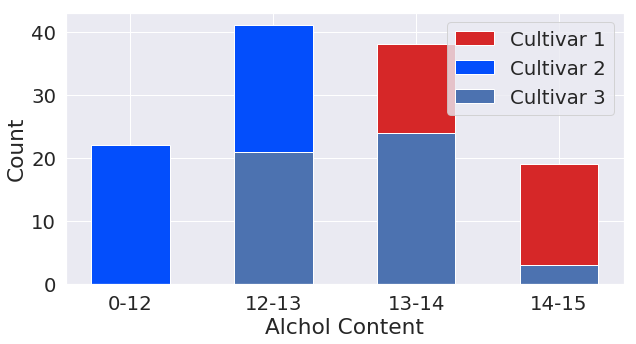

In [78]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['0-12','12-13','13-14','14-15']
p1 = plt.bar(categories, cultivar_1, .55, color = '#d62728')
p2 = plt.bar(categories, cultivar_2, .55, color = '#034efc')
p3 = plt.bar(categories, cultivar_3, .55, bottom = None)
plt.legend((p1[0],p2[0],p3[0]), ('Cultivar 1','Cultivar 2','Cultivar 3'))
plt.xlabel('Alchol Content')
plt.ylabel('Count')
plt.show()

In [0]:
# ?plt.bar

#Expected Value Calculation

In [80]:
row_sums = contingency_table.iloc[0:3, 4].values
col_sums = contingency_table.iloc[3, 0:4].values

print(row_sums)
print(col_sums)

[59 71 48]
[22 64 70 22]


In [81]:
total = contingency_table.loc['All','All']
total

178

In [82]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

print(np.array(expected))

[[ 7.29213483 21.21348315 23.20224719  7.29213483]
 [ 8.7752809  25.52808989 27.92134831  8.7752809 ]
 [ 5.93258427 17.25842697 18.87640449  5.93258427]]


In [83]:
observed = pd.crosstab(wine['Cultivar 1-3'], wine['alcohol_categories']).values
observed

array([[ 0,  2, 38, 19],
       [22, 41,  8,  0],
       [ 0, 21, 24,  3]])

#Chi-Squared Statistic With Numpy

In [84]:
#SINCE 'EXPECTED' TABLE AND 'OBSERVED' TABLE ARE IN THE SAME SHAPES,  
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

print(np.array(expected))
print(np.array(expected).shape)

[[ 7.29213483 21.21348315 23.20224719  7.29213483]
 [ 8.7752809  25.52808989 27.92134831  8.7752809 ]
 [ 5.93258427 17.25842697 18.87640449  5.93258427]]
(3, 4)


In [85]:
observed = pd.crosstab(wine['Cultivar 1-3'], wine['alcohol_categories']).values
print(observed.shape)
observed

(3, 4)


array([[ 0,  2, 38, 19],
       [22, 41,  8,  0],
       [ 0, 21, 24,  3]])

In [86]:
#CALCULATE CHI-SQUARED TEST STATISTIC
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f'Chi-Squared: {chi_squared}')

Chi-Squared: 114.80948305273668


In [87]:
#Calculate Degrees Of Freedom
# 6*1
dof=  (len(row_sums)-1)*(len(col_sums)-1)
print(f'Degrees of Freedom: {dof}')

Degrees of Freedom: 6


#RUN A CHI-SQUARED TEST USING SCIPY

In [88]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-Squared: {chi_squared}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom:{dof}')
print('Expected: \n', np.array(expected))

Chi-Squared: 114.80948305273668
P-value: 2.0018477108035028e-22
Degrees of Freedom:6
Expected: 
 [[ 7.29213483 21.21348315 23.20224719  7.29213483]
 [ 8.7752809  25.52808989 27.92134831  8.7752809 ]
 [ 5.93258427 17.25842697 18.87640449  5.93258427]]


#Null Hypothesis: Alcohol Category/Content bins are *independent* of Cultivar type.
Due to a p-value of 0, we **REJECT** the null hypothesis that Alcohol Category/Content and Cultivar type are independent

We conclude that **there is an association between Alcohol Category/Contentk and Cultivar type.**

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)